In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

def generating_func(x, err=0.5):
    return np.random.normal(10 - 1. / (x + 0.1), err)
def Sin_function(x):
    return np.sin(x)

In [43]:
# generate a sample of points
n_samples = 8
np.random.seed(0)
#x = 10 ** np.linspace(-2, 0, n_samples)
x=np.linspace(0, 2*math.pi , n_samples)
#y = generating_func(x)
y = Sin_function(x)

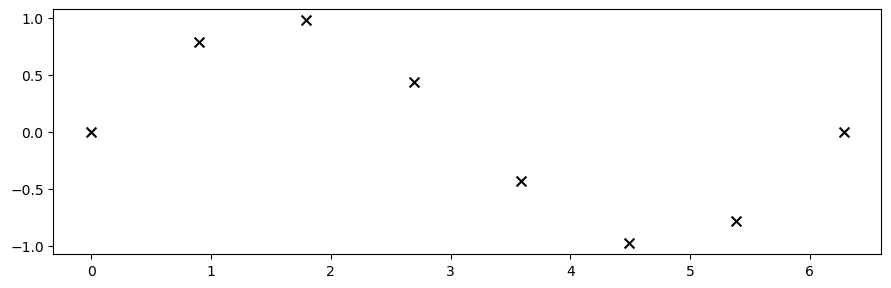

In [44]:
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
plt.scatter(x, y, marker='x', c='k', s=50)
plt.show()

In [49]:
#x_test = np.linspace(-0.2, 1.2, 1000)
x_test=np.linspace(0, 2*math.pi , n_samples)

In [59]:
titles = ['d = 1 (U-fitting; H bias)',
          'd = 2',
          'd = 3',
          'd = 4',
          'd = 5',
          'd = 6',
          'd = 8',
          'd = 10 (O-fitting; H var.)']
degrees = [1, 2, 3,4,5, 6, 8, 20]

In [60]:
np.random.seed(1)
#x1 = 10 ** np.linspace(-2, 0, n_samples)
x1=np.linspace(0, 2*math.pi , n_samples)
#y1 = generating_func(x1)
y1 = Sin_function(x1)

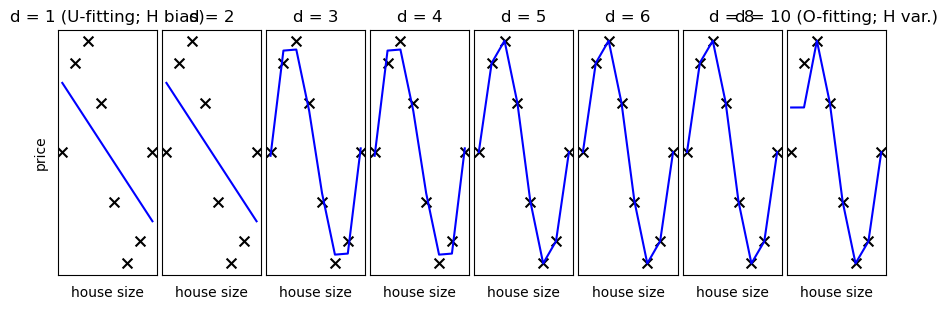

In [61]:
fig = plt.figure(figsize=(9, 3.5))
fig.subplots_adjust(left=0.06, right=0.98, bottom=0.15, top=0.85, wspace=0.05)
for i, d in enumerate(degrees):
    ax = fig.add_subplot(181 + i, xticks=[], yticks=[])
    ax.scatter(x, y, marker='x', c='k', s=50)

    model = make_pipeline(PolynomialFeatures(d), LinearRegression())
    model.fit(x[:, np.newaxis], y)
    ax.plot(x_test, model.predict(x_test[:, np.newaxis]), '-b')

    #ax.set_xlim(-0.2, 1.2)
    #ax.set_ylim(0, 12)
    ax.set_xlabel('house size')
    if i == 0:
        ax.set_ylabel('price')

    ax.set_title(titles[i])

plt.show()